## Module 5 - In this jupyter notebook, target productivity and productivity gaps are calculated
* Step 5a - Set up
* Step 5b - Calculate the target productivity 
* Step 5c - Identify bright spots
* Step 5d - calculate productivity gaps 
**===========================================================================================================**
![title](img/Fig5.PNG)
**===========================================================================================================**

## Step 5a - Set up

## i) Import packages/libraries

In [1]:
import os
import glob

import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle                # from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.lines as mlines                       # helps to sync colorbar  height with the plot
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable  # helps to sync colorbar height with the plot
from matplotlib import pyplot as plt
master_dr = os.path.split(os.getcwd())[0]

# change the directory to where the modules are saved
os.chdir(os.path.join(os.path.split(os.getcwd())[0], "Modules"))
from GIS_functions import GIS_function as gis

## Step 5b - Calculate the target productivity 

## i) Define function to plot productivity targets

In [2]:
def plotProductivityTargets (x, y, WP, title1,xlable1,ylable1,title2,xlable2,ylable2): 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax1.scatter(y,
                WP,
                marker='*',color="grey")

    ax1.scatter(np.nanpercentile(y, 95),
                np.nanpercentile(WP, 95),
                marker='*', color='black', s=100)

    ax1.axvline(np.nanpercentile(y, 95),
                color="#EE6666", linestyle="--")
    
    ax1.axhline(np.nanpercentile(WP, 95),
                color="#EE6666", linestyle="--")    
    
    # ax2 for histogram
    counts, bins, patches = ax2.hist(WP, bins=100, facecolor='skyblue', edgecolor='none', histtype="bar")

    # add legend 
    fakeLine = plt.Line2D([0,0], [0,1], color="#EE6666", linestyle='--')
    fakemark = mlines.Line2D([], [], color='black', marker='*', markersize=10)
    ax2.legend([fakeLine, fakemark], ["95 percentile", 'Productivity target'])

    # Colours for different percentiles of the histogram
    twentyfifth, ninetyfifth = np.nanpercentile(WP, [5, 95])
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < twentyfifth:
            patch.set_facecolor('#EE6666')
        elif leftside > ninetyfifth:
            patch.set_facecolor('green')

    # create legend
    handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ['#EE6666', 'green']]
    labels = ["0-5 Percentile",">95 Percentile"]
    plt.legend(handles, labels)

    # Title  
    ax1.set_title(title1, fontsize=14)
    ax1.set_xlabel(xlable1, fontsize=13)
    ax1.set_ylabel(ylable1, fontsize=13)

    ax2.set_title(title2, fontsize=14)
    ax2.set_xlabel(xlable2, fontsize=13)
    ax2.set_ylabel(ylable2, fontsize=13)

    return None 

## * Import the input data

In [3]:
# get seasonal data
seasonal_dr = os.path.join(master_dr, r"Data/tif/seasonal")
AETI_seasonal    = os.path.join(seasonal_dr, f"seasonal_AETI.tif")
biomass_seasonal    = os.path.join(seasonal_dr, f"seasonal_biomass.tif")
WPb_seasonal    = os.path.join(seasonal_dr, f"seasonal_WPb.tif")
yield_seasonal    = os.path.join(seasonal_dr, f"seasonal_yield.tif")
WPy_seasonal    = os.path.join(seasonal_dr, f"seasonal_WPy.tif")

## ii) Calculate the target biomass and target biomass water productivity

## ** Calculate the target biomass and target biomass WP

   Target_biomass  Target_WPb
0             8.0         1.5


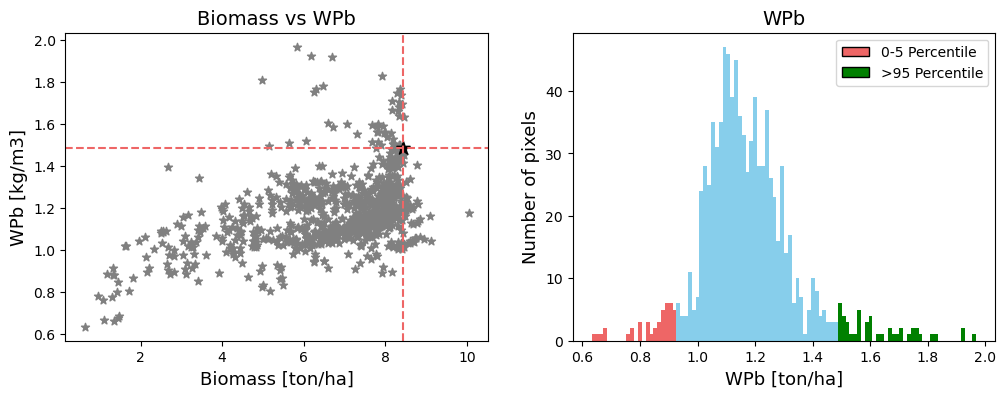

In [4]:
Season        = []
BiomassTarget = []
WPbTarget     = []

AETI   = gis.OpenAsArray(AETI_seasonal, nan_values=True) 
AGBM   = gis.OpenAsArray(biomass_seasonal,  nan_values=True) 
WPb    = gis.OpenAsArray(WPb_seasonal, nan_values=True)

# reshape the arrays
AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])
WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])

# targets productivity
Target_biomass = round(np.nanpercentile(Biomass_1D, 95), 0)  # Yield at 95 percentile
TargetWP       = round(np.nanpercentile(WPb_1D, 95), 1)         # WP at 95 percentile

BiomassTarget.append(Target_biomass)
WPbTarget.append(TargetWP)

# scatter plot of Yield vs WP and histogram of WP for 2017
title1  = 'Biomass vs WPb'
xlable1 = 'Biomass [ton/ha]'
ylable1 = 'WPb [kg/m3]'

title2  = 'WPb'
xlable2 = 'WPb [ton/ha]'
ylable2 = 'Number of pixels'

title1,xlable1,ylable1
plotProductivityTargets(AETI_1D,  Biomass_1D, WPb_1D, title1,xlable1,ylable1, title2,xlable2,ylable2)

# save the data into dataframe - tabular form
data_tuples = list(zip(BiomassTarget, WPbTarget))
df_targets = pd.DataFrame(data_tuples, columns=['Target_biomass', 'Target_WPb'])
print(df_targets)

## iii) Calculate the target crop yield and target crop water productivity

## ** Calculate the target crop yield and target crop WP

   Target_yield  Target_WPy
0           4.0         0.7


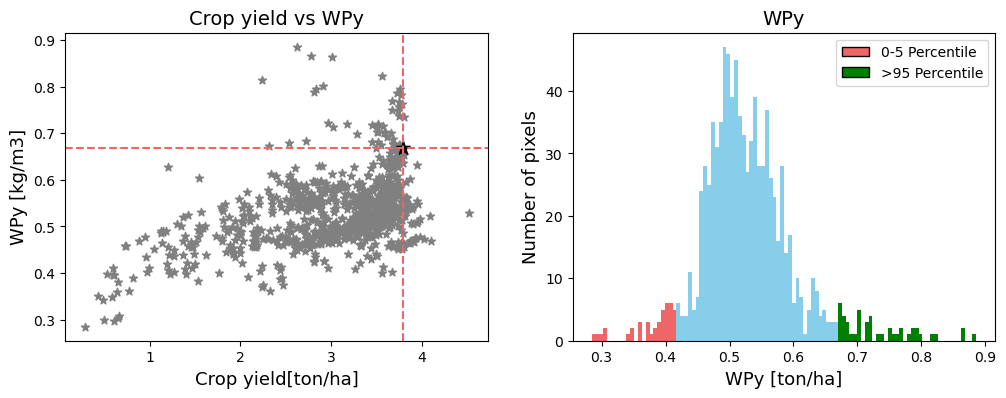

In [5]:
YieldTarget   = []
WPyTarget     = []

AETI   = gis.OpenAsArray(AETI_seasonal, nan_values=True) 
Yield  = gis.OpenAsArray(yield_seasonal,  nan_values=True) 
WPy    = gis.OpenAsArray(WPy_seasonal, nan_values=True)

# reshape the arrays
AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
Yield_1D   = np.reshape(Yield, Yield.shape[0] * Yield.shape[1])
WPy_1D     = np.reshape(WPy, WPy.shape[0] * WPy.shape[1])

# targets productivity
Target_yield   = round(np.nanpercentile(Yield_1D, 95), 0)  # Yield at 95 percentile
TargetWP       = round(np.nanpercentile(WPy_1D, 95), 1)         # WP at 95 percentile

YieldTarget.append(Target_yield)
WPyTarget.append(TargetWP )
    
# plot
title1  = 'Crop yield vs WPy'
xlable1 = 'Crop yield[ton/ha]'
ylable1 = 'WPy [kg/m3]'

title2  = 'WPy'
xlable2 = 'WPy [ton/ha]'
ylable2 = 'Number of pixels'

title1,xlable1,ylable1
plotProductivityTargets(AETI_1D,  Yield_1D, WPy_1D, title1,xlable1,ylable1, title2,xlable2,ylable2)
        

# save the data into dataframe - tabular form
data_tuples = list(zip(YieldTarget, WPyTarget))
df_targets = pd.DataFrame(data_tuples, columns=['Target_yield', 'Target_WPy'])
print(df_targets)

## Step 5c - Identify bright spots 
* The bright spots are idetified based on the target biomass and target biomass water productivity (WPb)

## ii) Map the bright spots in the study area

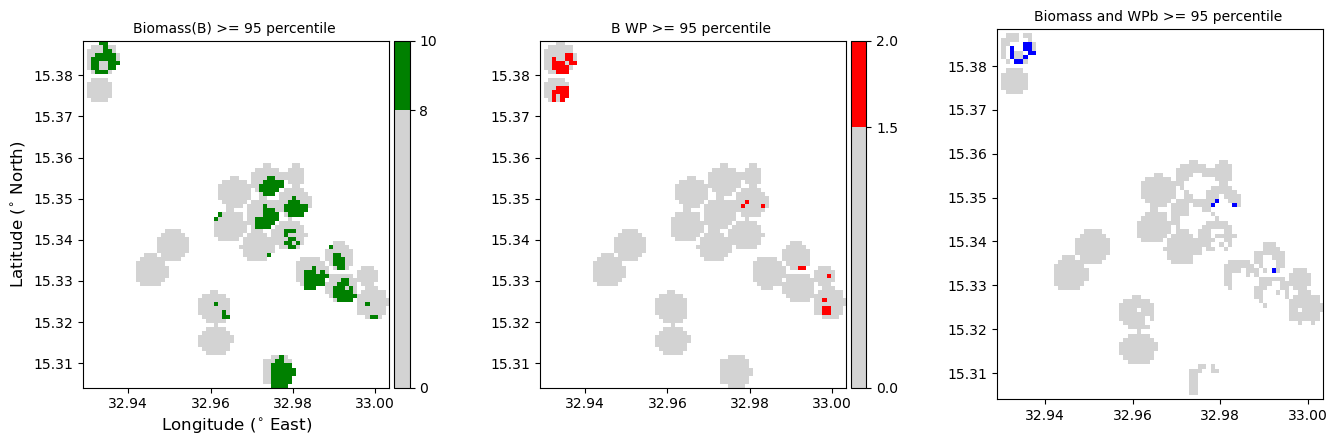

In [6]:
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(AETI_seasonal)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

AETI   = gis.OpenAsArray(AETI_seasonal, nan_values=True) 
AGBM   = gis.OpenAsArray(biomass_seasonal,  nan_values=True) 
WPb    = gis.OpenAsArray(WPb_seasonal, nan_values=True)

# reshape the arrays
AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])
WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])

# save the data into dataframe - tabular form
data_tuples = list(zip(AETI_1D,Biomass_1D,WPb_1D))
df          = pd.DataFrame(data_tuples, columns=['AETI','Biomass','WP'])

# thresholds for the targets
TargetBiomass = round(np.nanpercentile(Biomass_1D, 95), 0)
TargetWP      = round(np.nanpercentile(WPb_1D , 95), 1)
maxBiomass    = round(df["Biomass"].max(),1)
maxWPb        = round(df["WP"].max(),1)

## Plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# ax1, plot raster map, highlight Yield greater than or equal to the target
cmap1   = colors.ListedColormap(['lightgrey', 'green'])
bounds1 = [0, TargetBiomass, maxBiomass]
norm1   = colors.BoundaryNorm(bounds1, cmap1.N)

img1     = ax1.imshow(AGBM, cmap=cmap1, norm=norm1, extent=spatial_extent)
divider1 = make_axes_locatable(ax1)
cax1     = divider1.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img1, spacing='proportional', ax=ax1, cax=cax1)
ax1.set_title ('Biomass(B) >= 95 percentile ', fontsize=10)

### add axes label
ax1.set_xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
ax1.set_ylabel('Latitude ($^{\circ}$ North)', fontsize=12)

# ax2, plot raster map, highlight Yield greater than or equal to the target 
cmap2   = colors.ListedColormap(['lightgrey', 'red'])
bounds2 = [0, TargetWP, maxWPb]
norm2   = colors.BoundaryNorm(bounds2, cmap2.N)

img2     = ax2.imshow(WPb, cmap=cmap2, norm=norm2, extent=spatial_extent)
divider2 = make_axes_locatable(ax2)
cax2     = divider2.append_axes("right", size="5%", pad=0.05)
fig.colorbar(img2, spacing='proportional', ax=ax2, cax=cax2)
ax2.set_title ('B WP >= 95 percentile ', fontsize=10)  

# ax3, plot raster map, highlight when both Yield and WP greater than or equal to the targets
Biomass_targeSpots      = np.where(((AGBM >= TargetBiomass ) & (WPb >= TargetWP)), AGBM, np.nan)
Biomass_WPb_targetSpots = np.where((AGBM  < TargetBiomass), 1, Biomass_targeSpots)

cmap3   = colors.ListedColormap(['lightgrey', 'blue'])
bounds3 = [0, TargetWP, maxWPb]
norm3   = colors.BoundaryNorm(bounds3, cmap3.N)

img3 = ax3.imshow(Biomass_WPb_targetSpots, cmap=cmap3, norm=norm3, extent=spatial_extent)
# fig.colorbar(img3, spacing='proportional', ax=ax3)
ax3.set_title ('Biomass and WPb >= 95 percentile ', fontsize=10)  

plt.subplots_adjust(wspace=0.4)

plt.show()

In [7]:
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(AETI_seasonal)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

AETI   = gis.OpenAsArray(AETI_seasonal, nan_values=True)
AGBM   = gis.OpenAsArray(biomass_seasonal,  nan_values=True)
WPb    = gis.OpenAsArray(WPb_seasonal, nan_values=True)

# reshape the arrays
AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])
WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])

# save the data into dataframe - tabular form
data_tuples = list(zip(AETI_1D,Biomass_1D,WPb_1D))
df          = pd.DataFrame(data_tuples, columns=['AETI','Biomass','WP'])

# thresholds for the targets
TargetBiomass = round(np.nanpercentile(Biomass_1D, 95), 0)
low_Biomass = round(np.nanpercentile(Biomass_1D, 5), 0)
TargetWP      = round(np.nanpercentile(WPb_1D , 95), 1)
low_WP = round(np.nanpercentile(WPb_1D, 5), 1)

agbm_mask = np.ma.array(AGBM, mask=np.isnan(AGBM))
Biomass_targeSpots      = np.where((AGBM >= TargetBiomass), 1, 0)
Biomass_targeSpots      = np.where(agbm_mask.mask, np.nan, Biomass_targeSpots)
BiomassTargetspots_seasonal = os.path.join(seasonal_dr, 'seasonal_BiomassTargetspots.tif')
gis.CreateGeoTiff(BiomassTargetspots_seasonal, Biomass_targeSpots, driver, NDV, xsize, ysize, GeoT, Projection)
Biomass_lowspots      = np.where((AGBM <= low_Biomass), 1, 0)
Biomass_lowspots      = np.where(agbm_mask.mask, np.nan, Biomass_lowspots)
BiomassLowspots_seasonal = os.path.join(seasonal_dr, 'seasonal_BiomassLowspots.tif')
gis.CreateGeoTiff(BiomassLowspots_seasonal, Biomass_lowspots, driver, NDV, xsize, ysize, GeoT, Projection)

WPb_mask = np.ma.array(WPb, mask=np.isnan(WPb))
WPb_targeSpots      = np.where((WPb >= TargetWP), 1, 0)
WPb_targeSpots      = np.where(WPb_mask.mask, np.nan, WPb_targeSpots)
WPbTargetspots_seasonal = os.path.join(seasonal_dr, 'seasonal_WPbTargetspots.tif')
gis.CreateGeoTiff(WPbTargetspots_seasonal, WPb_targeSpots, driver, NDV, xsize, ysize, GeoT, Projection)
WPb_lowspots      = np.where((WPb <= low_WP), 1, 0)
WPb_lowspots      = np.where(WPb_mask.mask, np.nan, WPb_lowspots)
WPbLowspots_seasonal = os.path.join(seasonal_dr, 'seasonal_WPbLowspots.tif')
gis.CreateGeoTiff(WPbLowspots_seasonal, WPb_lowspots, driver, NDV, xsize, ysize, GeoT, Projection)

## Step 5d - Calculate productivity gaps
* i) Biomass gaps and biomass WP gaps
* ii)Crop yield gaps and crop WP gaps

## i) Biomass gaps and biomass water productivity gaps

## * Import the input data (biomass and WPb raster data)

## ** Biomass gaps

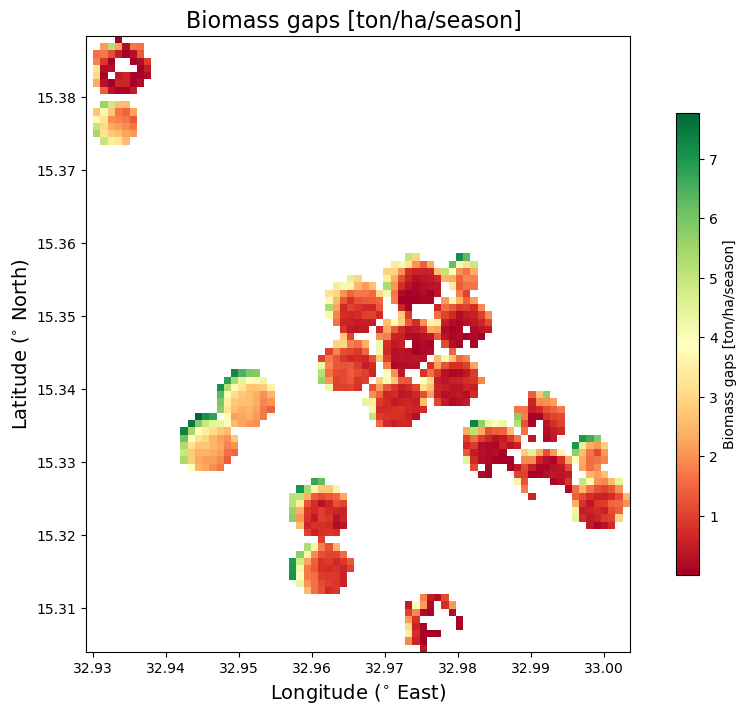

In [8]:
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(AETI_seasonal)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster


AGBM = gis.OpenAsArray(biomass_seasonal, nan_values=True) 

# productivity targets and produtivity gaps
Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])  # reshape the arrays
TargetBiomass = round(np.nanpercentile(Biomass_1D, 95), 1)
Biomassgap = np.where( AGBM < TargetBiomass, TargetBiomass - AGBM, np.nan)
        
# save yield gap
Biomassgap_seasonal = os.path.join(seasonal_dr, 'seasonal_biomassgap.tif')
gis.CreateGeoTiff(Biomassgap_seasonal, Biomassgap, driver, NDV, xsize, ysize, GeoT, Projection)

# Plot the raster map
seasonal = Biomassgap
plt.figure(figsize = (12,8))
plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
plt.colorbar(shrink=0.75, label ='Biomass gaps [ton/ha/season]')
plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
plt.title('Biomass gaps [ton/ha/season] ', fontsize=16)
plt.show () 

## *** Biomass WP gaps (WPb gaps)

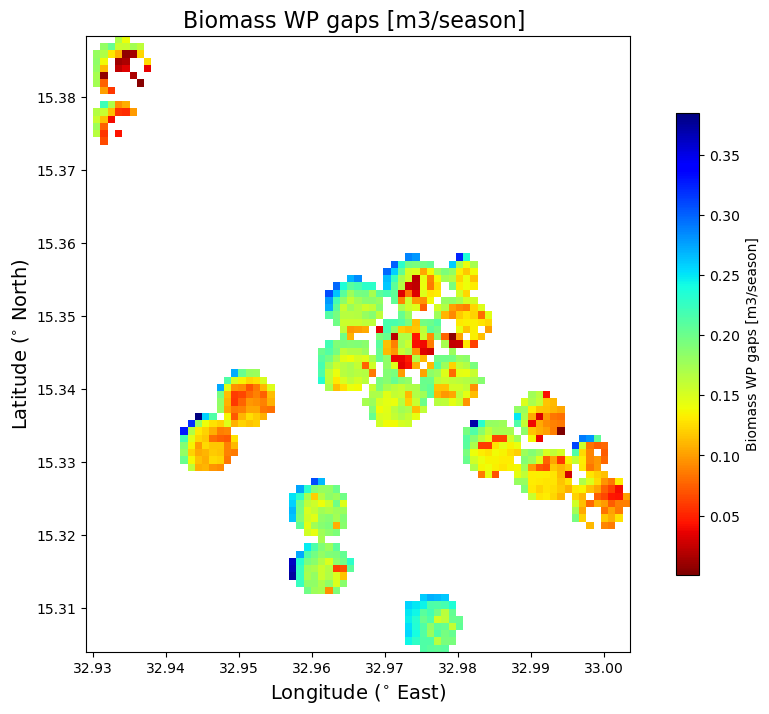

In [9]:
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(AETI_seasonal)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

WPb = gis.OpenAsArray(WPy_seasonal, nan_values=True) 

# productivity targets and produtivity gaps
WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])  # reshape the arrays
TargetWPb  = round(np.nanpercentile(WPb_1D, 95), 2)
WPbgap     = np.where( WPb < TargetWPb, TargetWPb - WPb, np.nan)

# save yield gap
WPbgap_seasonal = os.path.join(seasonal_dr, 'seasonal_WPbgap.tif')
gis.CreateGeoTiff(WPbgap_seasonal,  WPbgap, driver, NDV, xsize, ysize, GeoT, Projection) 

# Plot the raster map
seasonal =  WPbgap
plt.figure(figsize = (12,8))
plt.imshow(seasonal, cmap='jet_r', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
plt.colorbar(shrink=0.75, label = 'Biomass WP gaps [m3/season]')
plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
plt.title('Biomass WP gaps [m3/season] ', fontsize= 16)
plt.show () 

## ii) Crop yield gaps and crop water productivity gaps

## ** Crop yield gaps

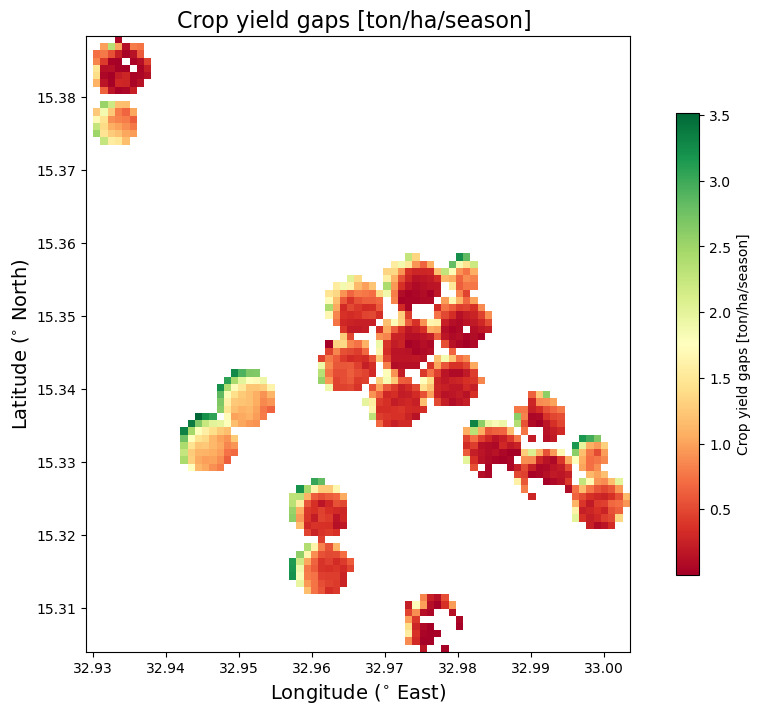

In [10]:
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(AETI_seasonal)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

Yield = gis.OpenAsArray(yield_seasonal, nan_values=True) 

# productivity targets and produtivity gaps
Yield_1D    = np.reshape(Yield, Yield.shape[0] * Yield.shape[1])  # reshape the arrays
TargetYield = round(np.nanpercentile(Yield_1D, 95), 1)
Yieldgap    = np.where( Yield < TargetYield, TargetYield - Yield, np.nan)

# save yield gap
yieldgap_seasonal = os.path.join(seasonal_dr, 'seasonal_yieldgap.tif')
gis.CreateGeoTiff(yieldgap_seasonal, Yieldgap, driver, NDV, xsize, ysize, GeoT, Projection)

# Plot the raster map
seasonal = Yieldgap
plt.figure(figsize = (12,8))
plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
plt.colorbar(shrink=0.75, label ='Crop yield gaps [ton/ha/season]')
plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
plt.title('Crop yield gaps [ton/ha/season] ', fontsize=16)
plt.show () 

## *** Crop WP gaps

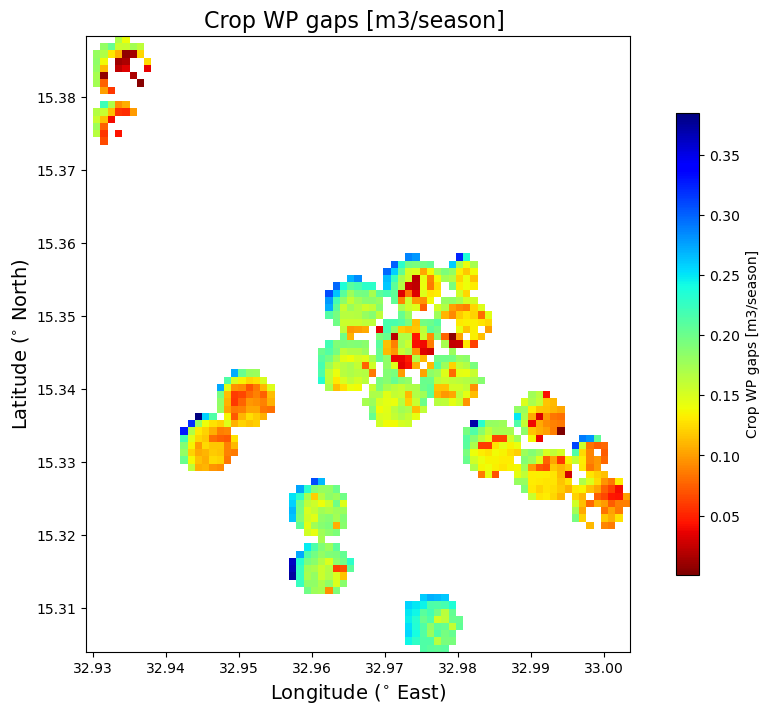

In [11]:
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(AETI_seasonal)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

WPy = gis.OpenAsArray(WPy_seasonal, nan_values=True) 
# productivity targets and produtivity gaps
WPy_1D     = np.reshape(WPy, WPy.shape[0] * WPy.shape[1])  # reshape the arrays
TargetWPy  = round(np.nanpercentile(WPy_1D, 95), 2)
WPygap     = np.where( WPy < TargetWPy, TargetWPy - WPy, np.nan)

# save yield gap
WPygap_seasonal = os.path.join(seasonal_dr, 'seasonal_WPygap.tif')
gis.CreateGeoTiff(WPygap_seasonal,  WPbgap, driver, NDV, xsize, ysize, GeoT, Projection) 

# Plot the raster map
seasonal =  WPygap
plt.figure(figsize = (12,8))
plt.imshow(seasonal, cmap='jet_r', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
plt.colorbar(shrink=0.75, label = 'Crop WP gaps [m3/season]')
plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
plt.title('Crop WP gaps [m3/season] ', fontsize= 16)
plt.show () 